In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns


In [2]:
solicitacoes_credito = pd.read_pickle('saidas/solicitacoes_credito_tratado.pkl')

In [3]:
solicitacoes_credito.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [4]:
solicitacoes_credito2 = solicitacoes_credito
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906


In [5]:
label_encoder_status = LabelEncoder()
label_encoder_periodoBalanco = LabelEncoder()
label_encoder_intervaloFundacao = LabelEncoder()

# Aplicando fit_transform para codificar
solicitacoes_credito2['status'] = label_encoder_status.fit_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.fit_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.fit_transform(solicitacoes_credito2['intervaloFundacao'])

solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906


In [6]:
# Descobrindo qual o melhor numero de clusters(cotovelo)
distorcions = []
n_clusters = range(2, 15)
for n_cluster2 in n_clusters:
    print(n_cluster2)
    distorcions.append(KMeans(n_clusters=n_cluster2, max_iter=10_000, n_init=100, random_state=61658).fit(solicitacoes_credito2).inertia_)


2
3
4
5
6
7
8
9
10
11
12
13
14


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

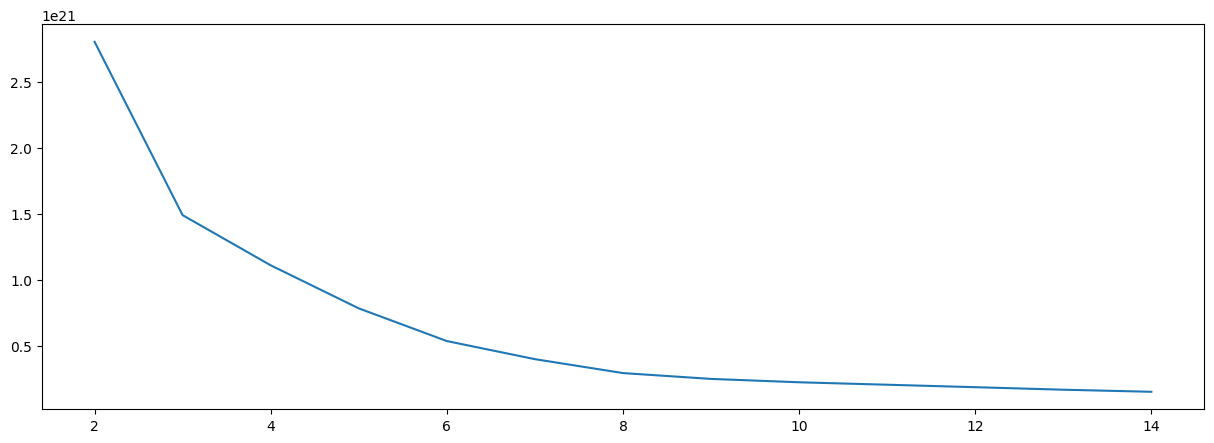

In [7]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distorcions)
plt.grid
# Aqui, consideramos o ultimo "cotovelo" que no caso é o 4

In [8]:
# Clusterização

km = KMeans(n_clusters=8, max_iter=10_000, n_init=100, random_state=61658)
X_t = km.fit_predict(solicitacoes_credito2)
X_t

# --------------------------------

X, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [9]:
solicitacoes_credito2['status2'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco2'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao2'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])


In [10]:
solicitacoes_credito2.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,faturamentoBruto,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,40779757.0,81459809.0,40680051.0,0,75000.0,89000.0,0.979529,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,11958227.0,9357949.0,0.0,0,120000.0,768233.0,0.995906,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos


In [11]:
solicitacoes_credito2.loc[:, 'cluster'] = X_t

In [12]:
solicitacoes_credito2.head()

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2,cluster
4,20,20,1486.95,50000.0,1,50000.0,51,14758917.0,12149031.0,25793410.0,...,81459809.0,40680051.0,0,75000.0,89000.0,0.979529,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos,0
7,4,102,208980.00,300000.0,1,300000.0,52,17801610.0,2538069.0,19415777.0,...,9357949.0,0.0,0,120000.0,768233.0,0.995906,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos,0
8,43,27,6432.00,400000.0,1,400000.0,27,36827690.0,13843198.0,39455945.0,...,6233236.0,-49267738.0,0,1000000.0,6910219.0,0.955988,AprovadoAnalista,2018-12-31T02:00:00,Acima de 17 anos,0
10,7,0,0.00,1000000.0,1,800000.0,42,2127907.0,704245.0,3609498.0,...,296634.0,-3299332.0,3,20000.0,81000.0,0.992835,AprovadoAnalista,2019-06-30T03:00:00,De 6 a 10 anos,0
11,26,0,0.00,200000.0,2,50000.0,27,5369982.0,6118711.0,5595689.0,...,-772398.0,-9455401.0,2,600000.0,183509.0,0.973388,AprovadoComite,2018-12-31T02:00:00,De 11 a 16 anos,0


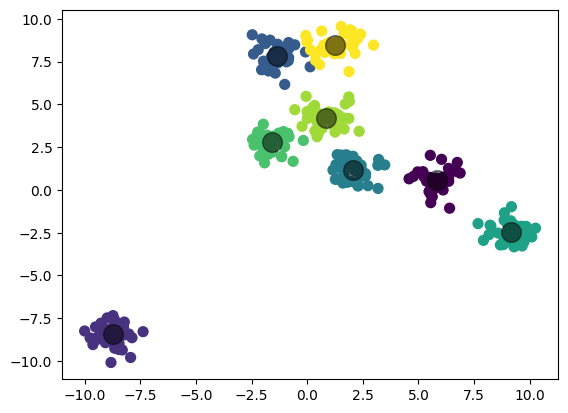

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [14]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   int32  
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   int32  
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [15]:
solicitacoes_credito2['status'] = label_encoder_status.inverse_transform(solicitacoes_credito2['status'])
solicitacoes_credito2['periodoBalanco'] = label_encoder_periodoBalanco.inverse_transform(solicitacoes_credito2['periodoBalanco'])
solicitacoes_credito2['intervaloFundacao'] = label_encoder_intervaloFundacao.inverse_transform(solicitacoes_credito2['intervaloFundacao'])

In [16]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

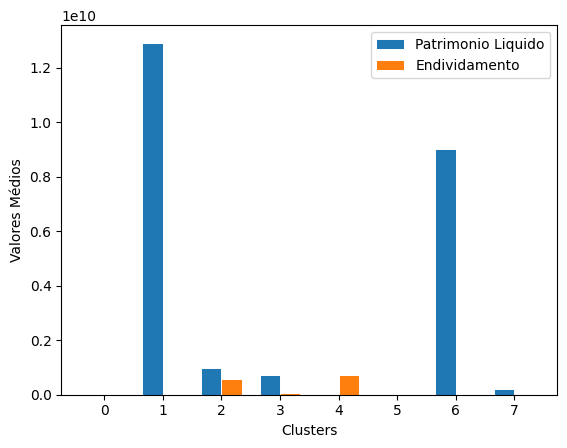

In [26]:
# Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
media_patrimonio_endividamento = solicitacoes_credito.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# Definir a largura de cada barra
largura_barra = 0.35
clusters = media_patrimonio_endividamento.index

# Criar subgráficos para patrimônio e endividamento lado a lado
fig, ax = plt.subplots()

# Barras para o patrimônio
ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# Barras para o endividamento
ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# Configurações do gráfico
ax.set_xlabel('Clusters')
ax.set_ylabel('Valores Médios')

ax.legend()

# Exibir gráfico
plt.show()


In [18]:
solicitacoes_credito.head(2)

,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,valorAprovado,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,...,margemBruta,custos,intervaloFundacao,capitalSocial,limiteEmpresaAnaliseCredito,score_atraso,status2,periodoBalanco2,intervaloFundacao2,cluster
4,20,20,1486.95,50000.0,AprovadoAnalista,50000.0,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,...,81459809.0,40680051.0,Acima de 17 anos,75000.0,89000.0,0.979529,AprovadoAnalista,2019-09-30T00:00:00,Acima de 17 anos,0
7,4,102,208980.00,300000.0,AprovadoAnalista,300000.0,2019-09-30T03:00:00,17801610.0,2538069.0,19415777.0,...,9357949.0,0.0,Acima de 17 anos,120000.0,768233.0,0.995906,AprovadoAnalista,2019-09-30T03:00:00,Acima de 17 anos,0


In [19]:
solicitacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 4 to 8963
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  4538 non-null   int64  
 1   prazoMedioRecebimentoVendas  4538 non-null   int64  
 2   titulosEmAberto              4538 non-null   float64
 3   valorSolicitado              4538 non-null   float64
 4   status                       4538 non-null   object 
 5   valorAprovado                4538 non-null   float64
 6   periodoBalanco               4538 non-null   object 
 7   ativoCirculante              4538 non-null   float64
 8   passivoCirculante            4538 non-null   float64
 9   totalAtivo                   4538 non-null   float64
 10  totalPatrimonioLiquido       4538 non-null   float64
 11  endividamento                4538 non-null   float64
 12  duplicatasAReceber           4538 non-null   float64
 13  estoque                

In [20]:
solicitacoes_credito.to_pickle('saidas/solicitacoes_credito_clusters.pkl')

In [21]:
solicitacoes_credito.to_excel('saidas/solicitacoes_credito_clusters.xlsx')

In [22]:
print(solicitacoes_credito.columns)

Index(['maiorAtraso', 'prazoMedioRecebimentoVendas', 'titulosEmAberto',
       'valorSolicitado', 'status', 'valorAprovado', 'periodoBalanco',
       'ativoCirculante', 'passivoCirculante', 'totalAtivo',
       'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber',
       'estoque', 'faturamentoBruto', 'margemBruta', 'custos',
       'intervaloFundacao', 'capitalSocial', 'limiteEmpresaAnaliseCredito',
       'score_atraso', 'status2', 'periodoBalanco2', 'intervaloFundacao2',
       'cluster'],
      dtype='object')


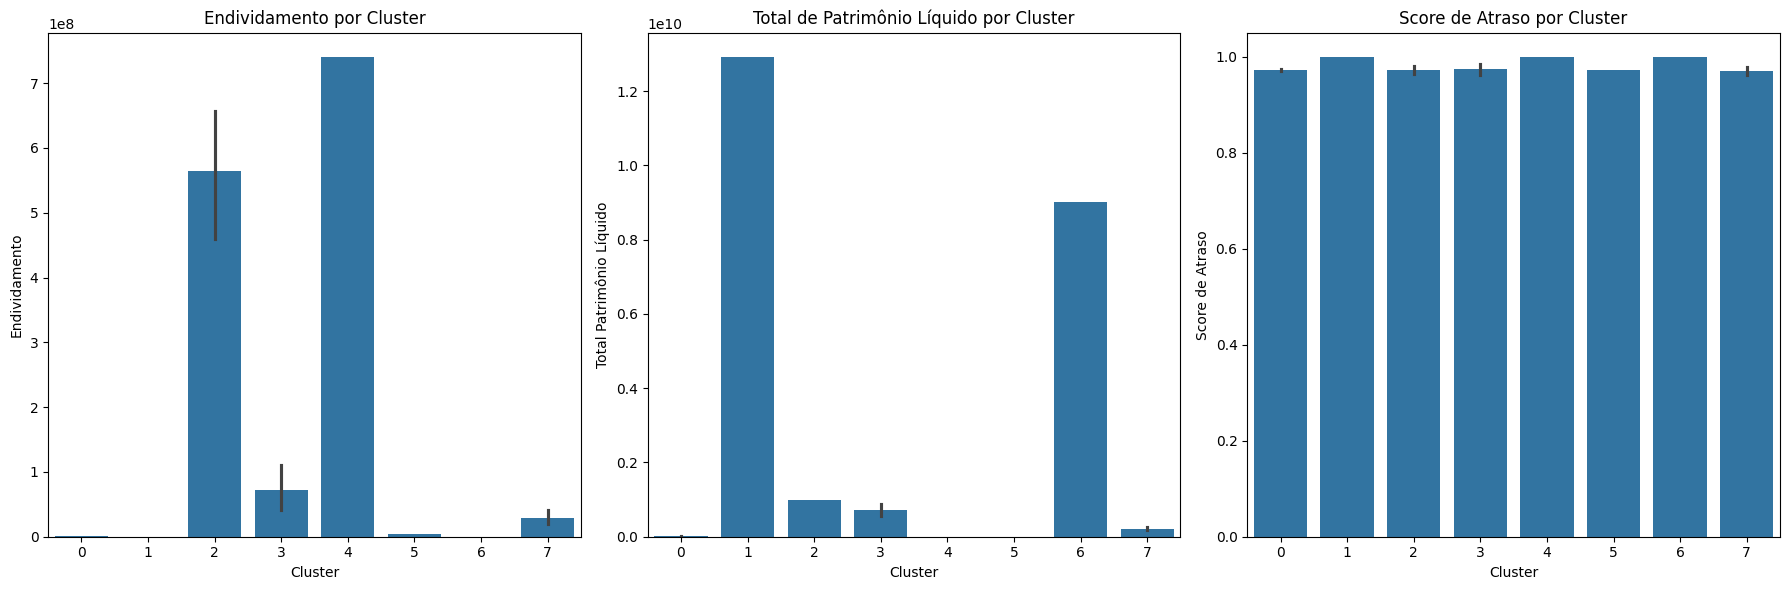

In [23]:


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para endividamento por cluster
sns.barplot(x='cluster', y='endividamento', data=solicitacoes_credito, ax=axs[0])
axs[0].set_title('Endividamento por Cluster')
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Endividamento')

# Gráfico de barras para total de patrimônio líquido por cluster
sns.barplot(x='cluster', y='totalPatrimonioLiquido', data=solicitacoes_credito, ax=axs[1])
axs[1].set_title('Total de Patrimônio Líquido por Cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Total Patrimônio Líquido')

# Gráfico de barras para score de atraso por cluster
sns.barplot(x='cluster', y='score_atraso', data=solicitacoes_credito, ax=axs[2])
axs[2].set_title('Score de Atraso por Cluster')
axs[2].set_xlabel('Cluster')
axs[2].set_ylabel('Score de Atraso')

plt.tight_layout()
plt.show()


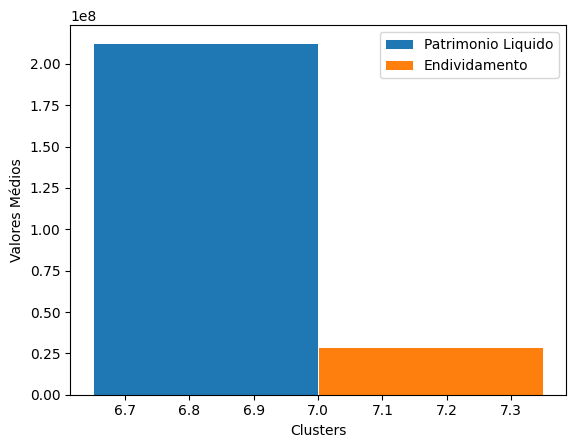

In [47]:
# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 7]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.35
# clusters = media_patrimonio_endividamento.index

# # Criar subgráficos para patrimônio e endividamento lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra/2, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimonio Liquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters + largura_barra/2, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)


# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')

# ax.legend()

# # Exibir gráfico
# plt.show()

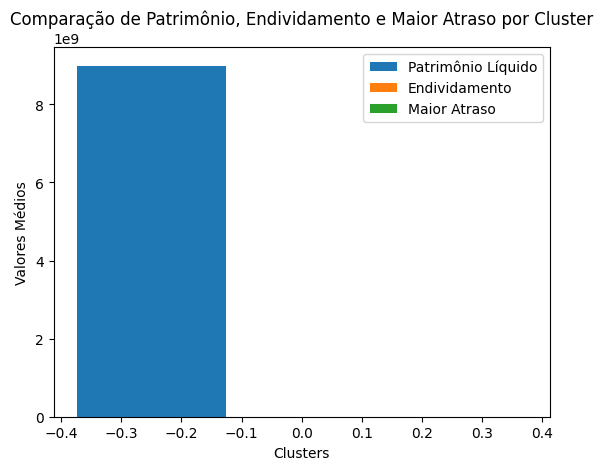

In [46]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Filtrar o DataFrame para incluir apenas as informações do cluster 0
# cluster_0 = solicitacoes_credito[solicitacoes_credito['cluster'] == 6]

# # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio', 'endividamento' e 'maiorAtraso'
# media_patrimonio_endividamento = cluster_0.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento', 'maiorAtraso']].mean()

# # Definir a largura de cada barra
# largura_barra = 0.25
# clusters = np.arange(len(media_patrimonio_endividamento.index))  # Gera um array com os índices dos clusters

# # Criar subgráficos para patrimônio, endividamento e maior atraso lado a lado
# fig, ax = plt.subplots()

# # Barras para o patrimônio
# ax.bar(clusters - largura_barra, media_patrimonio_endividamento['totalPatrimonioLiquido'], width=largura_barra, label='Patrimônio Líquido', edgecolor="white", linewidth=0.7)

# # Barras para o endividamento
# ax.bar(clusters, media_patrimonio_endividamento['endividamento'], width=largura_barra, label='Endividamento', edgecolor="white", linewidth=0.7)

# # Barras para o maior atraso
# ax.bar(clusters + largura_barra, media_patrimonio_endividamento['maiorAtraso'], width=largura_barra, label='Maior Atraso', edgecolor="white", linewidth=0.7)

# # Configurações do gráfico
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Valores Médios')
# ax.set_title('Comparação de Patrimônio, Endividamento e Maior Atraso por Cluster')
# ax.legend()

# # Exibir gráfico
# plt.show()


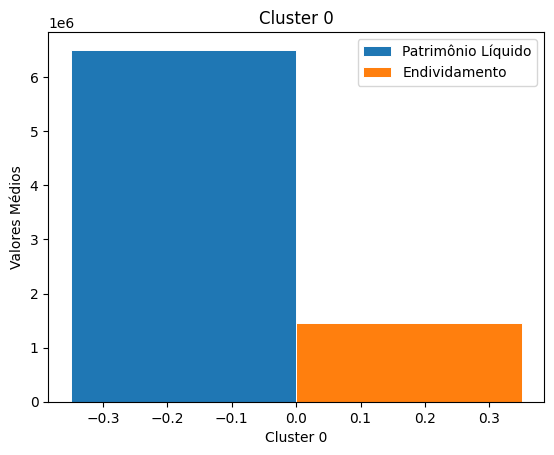

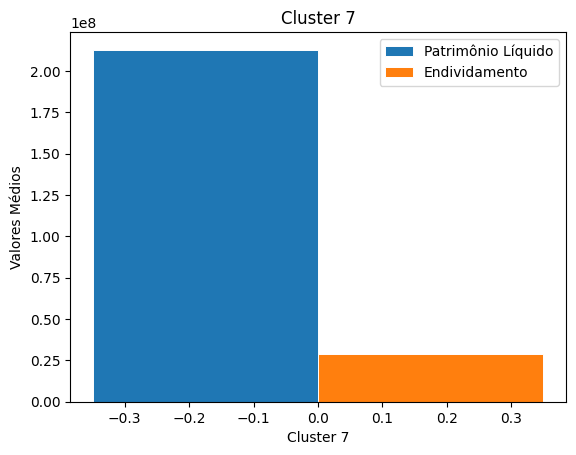

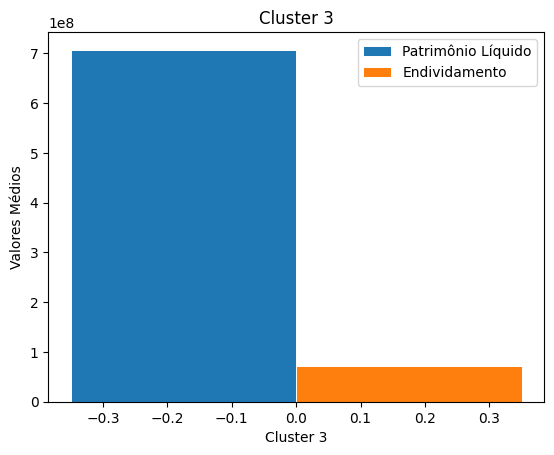

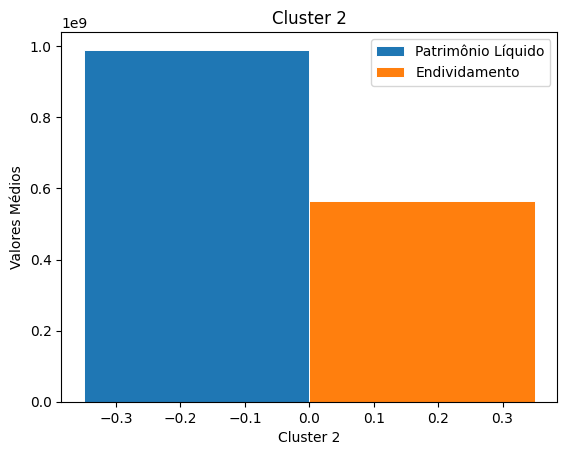

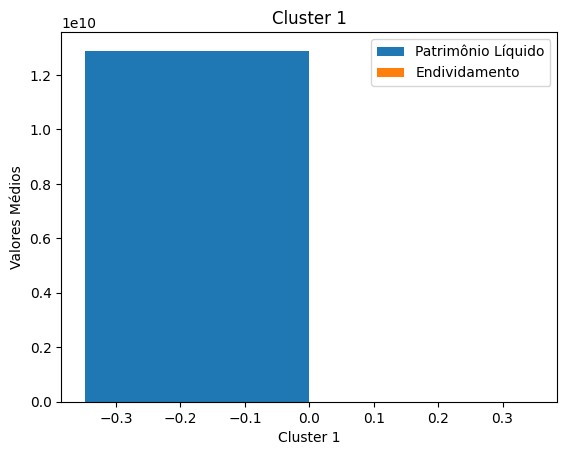

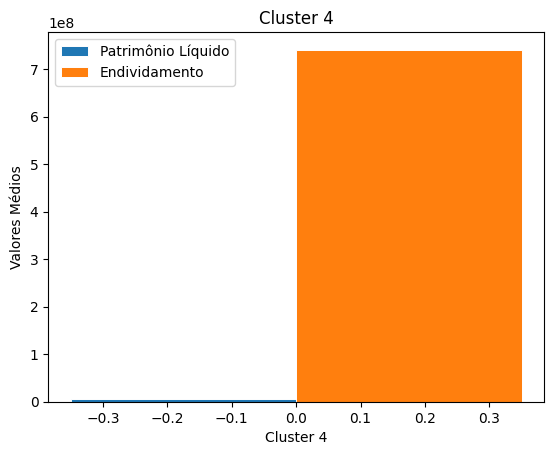

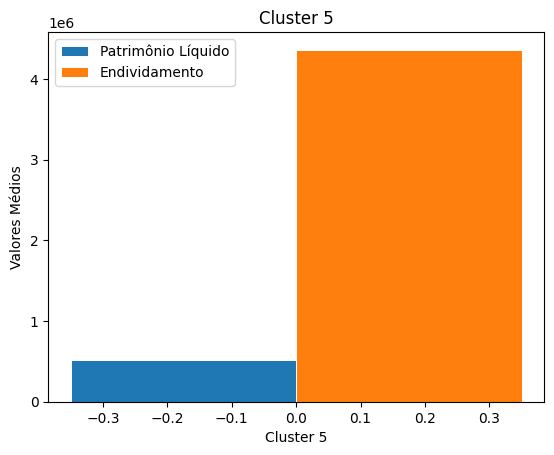

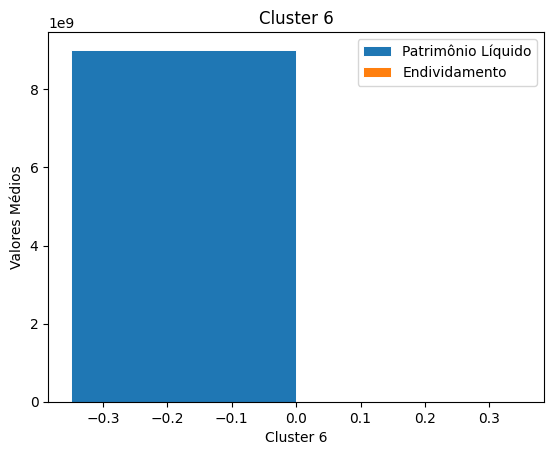

In [48]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Listar os clusters únicos presentes no DataFrame
# clusters_unicos = solicitacoes_credito['cluster'].unique()

# # Definir a largura de cada barra
# largura_barra = 0.35

# # Loop para gerar o gráfico de cada cluster
# for cluster in clusters_unicos:
#     # Filtrar o DataFrame para incluir apenas as informações do cluster atual
#     cluster_data = solicitacoes_credito[solicitacoes_credito['cluster'] == cluster]
    
#     # Agrupar pelo campo 'cluster' e calcular a média de 'patrimonio' e 'endividamento'
#     media_patrimonio_endividamento = cluster_data.groupby('cluster')[['totalPatrimonioLiquido', 'endividamento']].mean()
    
#     # Criar subgráficos para patrimônio e endividamento lado a lado
#     fig, ax = plt.subplots()
    
#     # Barras para o patrimônio
#     ax.bar(np.arange(len(media_patrimonio_endividamento)) - largura_barra/2, 
#            media_patrimonio_endividamento['totalPatrimonioLiquido'], 
#            width=largura_barra, 
#            label='Patrimônio Líquido', 
#            edgecolor="white", 
#            linewidth=0.7)
    
#     # Barras para o endividamento
#     ax.bar(np.arange(len(media_patrimonio_endividamento)) + largura_barra/2, 
#            media_patrimonio_endividamento['endividamento'], 
#            width=largura_barra, 
#            label='Endividamento', 
#            edgecolor="white", 
#            linewidth=0.7)

#     # Configurações do gráfico
#     ax.set_xlabel('Cluster {}'.format(cluster))
#     ax.set_ylabel('Valores Médios')
#     ax.set_title(f'Cluster {cluster}')
#     ax.legend()

#     # Exibir o gráfico para cada cluster
#     plt.show()
